In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## TRANSFORMER

In [146]:
model_type = 'TRANSFORMER'
use_prob = False

# 데이터 로드
train_data = f'{model_type}/portfolio_weights_{model_type}_{"with_prob" if use_prob else "no_prob"}_sharpe_ratio_train.csv'
val_data = f'{model_type}/portfolio_weights_{model_type}_{"with_prob" if use_prob else "no_prob"}_sharpe_ratio_val.csv'
test_data = f'{model_type}/portfolio_weights_{model_type}_{"with_prob" if use_prob else "no_prob"}_sharpe_ratio.csv'

# Train 데이터 전처리
train_df = pd.read_csv(train_data, index_col=0)
train_df.index = pd.to_datetime(train_df.index)

# Val 데이터 전처리
val_df = pd.read_csv(val_data, index_col=0)
val_df.index = pd.to_datetime(val_df.index)

# Test 데이터 전처리 
test_df = pd.read_csv(test_data, index_col=0) 
test_df.index = pd.to_datetime(test_df.index)

# 20 거래일 간격으로 인덱스 생성
train_indices = np.arange(0, len(train_df), 20)
val_indices = np.arange(0, len(val_df), 20)
test_indices = np.arange(0, len(test_df), 20)

train_df = train_df.iloc[train_indices]
val_df = val_df.iloc[val_indices]
test_df = test_df.iloc[test_indices]

# 소수점 4자리 이하는 버림
train_df = train_df.round(3)
val_df = val_df.round(3)
test_df = test_df.round(3)

# 0이 아닌 칼럼만 선택
train_df = train_df.loc[:, (train_df != 0).any()]
val_df = val_df.loc[:, (val_df != 0).any()]
test_df = test_df.loc[:, (test_df != 0).any()]

train_df

FileNotFoundError: [Errno 2] No such file or directory: 'TRANSFORMER/portfolio_weights_TRANSFORMER_no_prob_sharpe_ratio.csv'

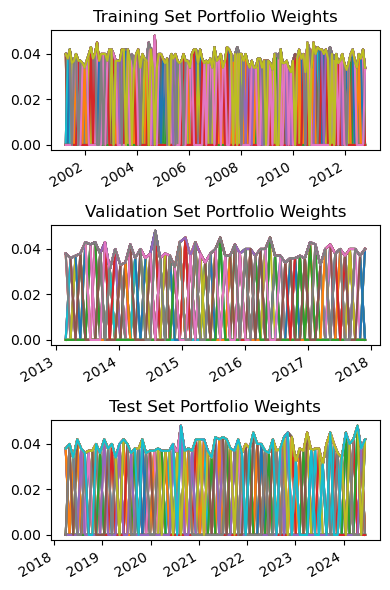

In [120]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(4, 6))

train_df.plot(kind='line', ax=ax1, legend=False)
ax1.set_title('Training Set Portfolio Weights')

val_df.plot(kind='line', ax=ax2, legend=False)
ax2.set_title('Validation Set Portfolio Weights')

test_df.plot(kind='line', ax=ax3, legend=False)
ax3.set_title('Test Set Portfolio Weights')

plt.tight_layout()

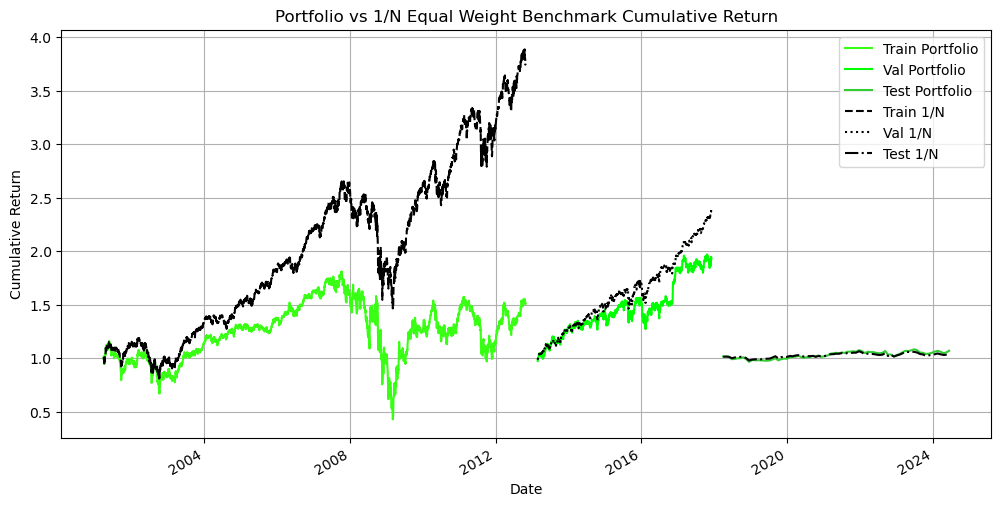

In [147]:
return_path = '../data/filtered_returns.csv'
return_df = pd.read_csv(return_path, index_col=0)
return_df.index = pd.to_datetime(return_df.index)

# Train/Test 데이터 각각에 대해 return_df 재정렬
train_return_df = return_df.reindex(train_df.index)
val_return_df = return_df.reindex(val_df.index)
test_return_df = return_df.reindex(test_df.index)

# 1/N 동일가중 포트폴리오 생성
n_assets = return_df.shape[1]
equal_weights = pd.DataFrame(1/n_assets, index=return_df.index, columns=return_df.columns)

# Train 포트폴리오 수익률 계산
train_portfolio_return = (train_df * train_return_df).sum(axis=1)
train_portfolio_cumulative = (1 + train_portfolio_return).cumprod()

# Val 포트폴리오 수익률 계산
val_portfolio_return = (val_df * val_return_df).sum(axis=1)
val_portfolio_cumulative = (1 + val_portfolio_return).cumprod()

# Test 포트폴리오 수익률 계산
test_portfolio_return = (test_df * test_return_df).sum(axis=1)
test_portfolio_cumulative = (1 + test_portfolio_return).cumprod()

# 벤치마크(1/N) 수익률 계산
train_benchmark_return = (equal_weights.loc[train_df.index] * train_return_df).sum(axis=1)
train_benchmark_cumulative = (1 + train_benchmark_return).cumprod()

val_benchmark_return = (equal_weights.loc[val_df.index] * val_return_df).sum(axis=1)
val_benchmark_cumulative = (1 + val_benchmark_return).cumprod()

test_benchmark_return = (equal_weights.loc[test_df.index] * test_return_df).sum(axis=1)
test_benchmark_cumulative = (1 + test_benchmark_return).cumprod()

# 포트폴리오 vs 벤치마크 누적 수익률 그래프
plt.figure(figsize=(12, 6))
train_portfolio_cumulative.plot(label='Train Portfolio', color='#39FF14')  # 형광색
val_portfolio_cumulative.plot(label='Val Portfolio', color='#00FF00')  # 형광색
test_portfolio_cumulative.plot(label='Test Portfolio', color='#32CD32')  # 형광색
train_benchmark_cumulative.plot(label='Train 1/N', color='black', linestyle='--')  # 검은색
val_benchmark_cumulative.plot(label='Val 1/N', color='black', linestyle=':')  # 검은색
test_benchmark_cumulative.plot(label='Test 1/N', color='black', linestyle='-.')  # 검은색
plt.title('Portfolio vs 1/N Equal Weight Benchmark Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

---

## TCN

In [148]:
model_type = 'TCN'
use_prob = False

# 데이터 로드
train_data = f'{model_type}/portfolio_weights_{model_type}_{"with_prob" if use_prob else "no_prob"}_sharpe_ratio_train.csv'
val_data = f'{model_type}/portfolio_weights_{model_type}_{"with_prob" if use_prob else "no_prob"}_sharpe_ratio_val.csv'
test_data = f'{model_type}/portfolio_weights_{model_type}_{"with_prob" if use_prob else "no_prob"}_sharpe_ratio.csv'

# Train 데이터 전처리
train_df = pd.read_csv(train_data, index_col=0)
train_df.index = pd.to_datetime(train_df.index)

# Val 데이터 전처리
val_df = pd.read_csv(val_data, index_col=0)
val_df.index = pd.to_datetime(val_df.index)

# Test 데이터 전처리 
test_df = pd.read_csv(test_data, index_col=0) 
test_df.index = pd.to_datetime(test_df.index)

# 20 거래일 간격으로 인덱스 생성
train_indices = np.arange(0, len(train_df), 20)
val_indices = np.arange(0, len(val_df), 20)
test_indices = np.arange(0, len(test_df), 20)

train_df = train_df.iloc[train_indices]
val_df = val_df.iloc[val_indices]
test_df = test_df.iloc[test_indices]

# 소수점 4자리 이하는 버림
train_df = train_df.round(3)
val_df = val_df.round(3)
test_df = test_df.round(3)

# 0이 아닌 칼럼만 선택
train_df = train_df.loc[:, (train_df != 0).any()]
val_df = val_df.loc[:, (val_df != 0).any()]
test_df = test_df.loc[:, (test_df != 0).any()]

train_df

FileNotFoundError: [Errno 2] No such file or directory: 'TCN/portfolio_weights_TCN_no_prob_sharpe_ratio.csv'

In [149]:
test_df

,AAPL,AMZN,MSFT,GOOGL,JNJ,GOOG,XOM,JPM,BA,WMT,...,HON,SCHW,TXN,AMGN,SLB,CVS,NFLX,GILD,COST,ADBE
2018-03-29,0.2,0.009,0.001,0.024,0.004,0.028,0.005,0.002,0.004,0.003,...,0.011,0.002,0.003,0.001,0.067,0.031,0.194,0.005,0.022,0.002
2018-04-27,0.2,0.009,0.001,0.024,0.004,0.028,0.005,0.002,0.004,0.003,...,0.011,0.002,0.003,0.001,0.067,0.031,0.194,0.005,0.022,0.002
2018-05-25,0.2,0.009,0.001,0.024,0.004,0.029,0.005,0.002,0.004,0.003,...,0.011,0.002,0.003,0.001,0.067,0.031,0.194,0.005,0.022,0.002
2018-06-25,0.2,0.009,0.001,0.024,0.004,0.029,0.005,0.002,0.004,0.003,...,0.011,0.002,0.003,0.001,0.067,0.031,0.194,0.005,0.021,0.002
2018-07-24,0.2,0.009,0.001,0.024,0.004,0.029,0.005,0.002,0.004,0.003,...,0.011,0.002,0.003,0.001,0.067,0.031,0.194,0.005,0.021,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-15,0.2,0.009,0.001,0.024,0.004,0.029,0.005,0.002,0.004,0.003,...,0.011,0.002,0.003,0.001,0.068,0.031,0.194,0.005,0.021,0.002
2024-03-15,0.2,0.009,0.001,0.023,0.004,0.028,0.005,0.002,0.004,0.003,...,0.011,0.002,0.003,0.001,0.068,0.031,0.195,0.005,0.022,0.002
2024-04-15,0.2,0.009,0.001,0.024,0.004,0.028,0.005,0.002,0.004,0.003,...,0.011,0.002,0.003,0.001,0.067,0.031,0.194,0.005,0.022,0.002
2024-05-13,0.2,0.009,0.001,0.023,0.004,0.028,0.005,0.002,0.004,0.003,...,0.011,0.002,0.003,0.001,0.069,0.031,0.194,0.005,0.022,0.002


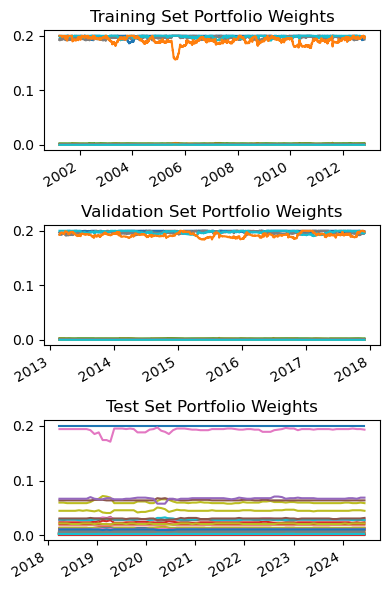

In [150]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(4, 6))

train_df.plot(kind='line', ax=ax1, legend=False)
ax1.set_title('Training Set Portfolio Weights')

val_df.plot(kind='line', ax=ax2, legend=False)
ax2.set_title('Validation Set Portfolio Weights')

test_df.plot(kind='line', ax=ax3, legend=False)
ax3.set_title('Test Set Portfolio Weights')

plt.tight_layout()

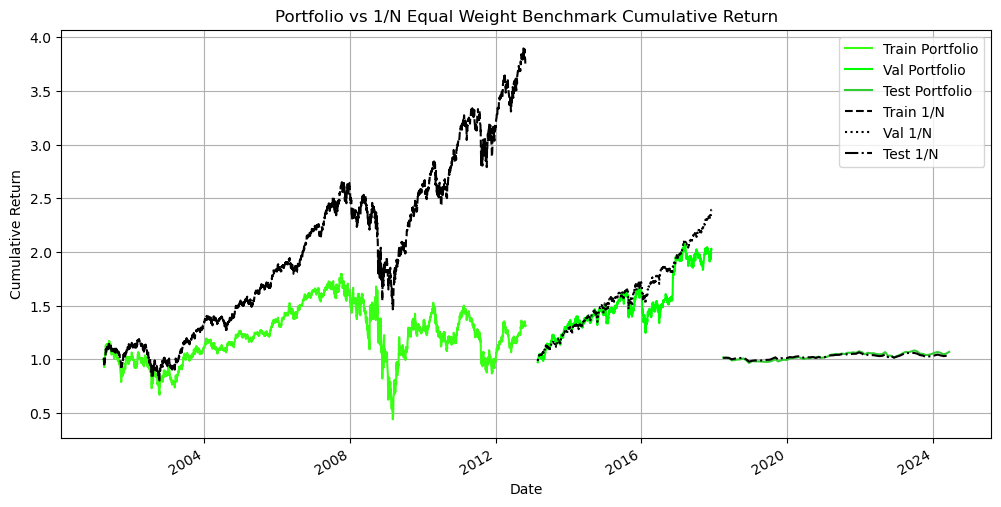

In [151]:
return_path = '../data/filtered_returns.csv'
return_df = pd.read_csv(return_path, index_col=0)
return_df.index = pd.to_datetime(return_df.index)

# Train/Test 데이터 각각에 대해 return_df 재정렬
train_return_df = return_df.reindex(train_df.index)
val_return_df = return_df.reindex(val_df.index)
test_return_df = return_df.reindex(test_df.index)

# 1/N 동일가중 포트폴리오 생성
n_assets = return_df.shape[1]
equal_weights = pd.DataFrame(1/n_assets, index=return_df.index, columns=return_df.columns)

# Train 포트폴리오 수익률 계산
train_portfolio_return = (train_df * train_return_df).sum(axis=1)
train_portfolio_cumulative = (1 + train_portfolio_return).cumprod()

# Val 포트폴리오 수익률 계산
val_portfolio_return = (val_df * val_return_df).sum(axis=1)
val_portfolio_cumulative = (1 + val_portfolio_return).cumprod()

# Test 포트폴리오 수익률 계산
test_portfolio_return = (test_df * test_return_df).sum(axis=1)
test_portfolio_cumulative = (1 + test_portfolio_return).cumprod()

# 벤치마크(1/N) 수익률 계산
train_benchmark_return = (equal_weights.loc[train_df.index] * train_return_df).sum(axis=1)
train_benchmark_cumulative = (1 + train_benchmark_return).cumprod()

val_benchmark_return = (equal_weights.loc[val_df.index] * val_return_df).sum(axis=1)
val_benchmark_cumulative = (1 + val_benchmark_return).cumprod()

test_benchmark_return = (equal_weights.loc[test_df.index] * test_return_df).sum(axis=1)
test_benchmark_cumulative = (1 + test_benchmark_return).cumprod()

# 포트폴리오 vs 벤치마크 누적 수익률 그래프
plt.figure(figsize=(12, 6))
train_portfolio_cumulative.plot(label='Train Portfolio', color='#39FF14')  # 형광색
val_portfolio_cumulative.plot(label='Val Portfolio', color='#00FF00')  # 형광색
test_portfolio_cumulative.plot(label='Test Portfolio', color='#32CD32')  # 형광색
train_benchmark_cumulative.plot(label='Train 1/N', color='black', linestyle='--')  # 검은색
val_benchmark_cumulative.plot(label='Val 1/N', color='black', linestyle=':')  # 검은색
test_benchmark_cumulative.plot(label='Test 1/N', color='black', linestyle='-.')  # 검은색
plt.title('Portfolio vs 1/N Equal Weight Benchmark Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

---

## GRU

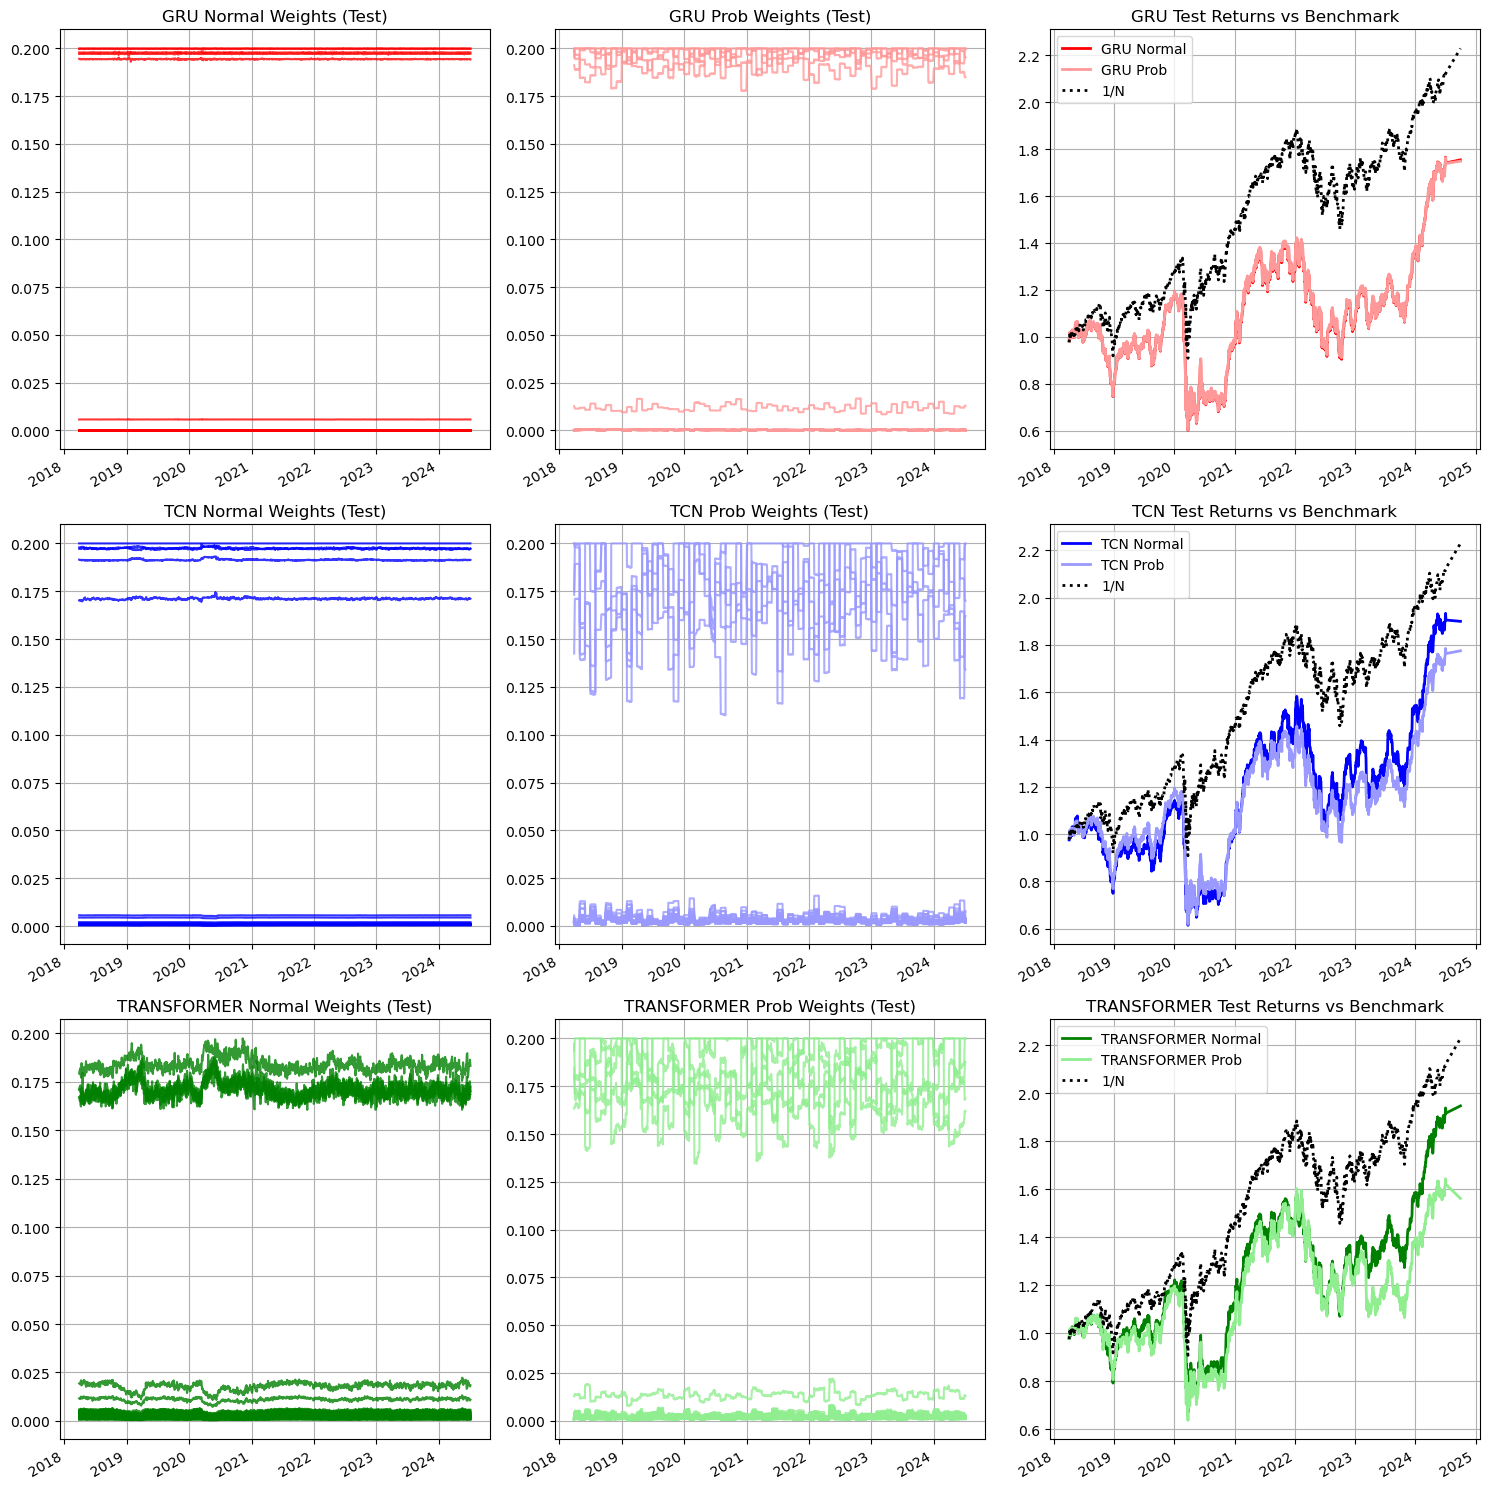

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 모델 타입과 확률 사용 여부 설정
model_types = ['GRU', 'TCN', 'TRANSFORMER']
use_probs = [False, True]
objective = 'maxsharpe'

# 색상 설정 - 모델별 기본 색상과 확률 사용시 밝은 색상 
colors = {
    'GRU': {
        False: '#FF0000',      # 진한 빨간색
        True: '#FF9999'        # 연한 빨간색
    },
    'TCN': {
        False: '#0000FF',      # 진한 파란색 
        True: '#9999FF'        # 연한 파란색
    },
    'TRANSFORMER': {
        False: '#008000',      # 진한 녹색
        True: '#90EE90'        # 연한 녹색
    },
    'benchmark': '#000000'     # 검정색
}

# 3x3 서브플롯 생성
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# 수익률 데이터 로드 
return_path = '../data/filtered_returns.csv'
return_df = pd.read_csv(return_path, index_col=0)
return_df.index = pd.to_datetime(return_df.index)

# 벤치마크 생성 (2018년부터 1/N 전략)
n_assets = return_df.shape[1]
start_date = '2018-01-01'
return_df = return_df.loc[start_date:]

# 모델 포트폴리오와 벤치마크의 리밸런싱 날짜를 동일하게 설정하기 위해 날짜 리스트 생성
rebalance_dates = None  # 리밸런싱 날짜 리스트 초기화

for i, model_type in enumerate(model_types):
    for j, use_prob in enumerate(use_probs):
        # 데이터 로드
        try:
            test_data = f'{model_type}/portfolio_weights_{model_type}_{"prob" if use_prob else "noprob"}_{objective}.csv'

            # 테스트 데이터 전처리
            test_df = pd.read_csv(test_data, index_col=0)
            test_df.index = pd.to_datetime(test_df.index)

            # 리밸런싱 날짜 설정 (첫 실행 시)
            if rebalance_dates is None:
                rebalance_dates = test_df.index

            # 가중치 플롯 (첫 두 열)
            if j == 0:  # 일반 가중치
                test_df.plot(ax=axes[i,0], color=colors[model_type][False], alpha=0.5, legend=False)
                axes[i,0].set_title(f'{model_type} Normal Weights (Test)')
                axes[i,0].grid(True, alpha=0.3)
            else:  # 확률 가중치
                test_df.plot(ax=axes[i,1], color=colors[model_type][True], alpha=0.5, legend=False)
                axes[i,1].set_title(f'{model_type} Prob Weights (Test)')
                axes[i,1].grid(True, alpha=0.3)

            # 포트폴리오 수익률 계산
            portfolio_returns = []
            portfolio_dates = []

            for t in range(len(test_df)-1):
                weights_t = test_df.iloc[t]
                start_date = test_df.index[t]
                end_date = test_df.index[t+1]

                # 리밸런싱 기간의 수익률 데이터 추출
                period_returns = return_df.loc[start_date:end_date]
                # start_date의 수익률은 포함하지 않음 (이미 가중치에 반영됨)
                period_returns = period_returns.iloc[1:]

                # 일별 포트폴리오 수익률 계산
                daily_portfolio_returns = (period_returns * weights_t).sum(axis=1)
                # 해당 기간의 누적 수익률 계산
                cumulative_return = (1 + daily_portfolio_returns).prod() - 1

                # 결과 저장
                portfolio_returns.append(cumulative_return)
                portfolio_dates.append(end_date)

            # 마지막 기간 처리 (마지막 리밸런싱 이후의 기간)
            # 마지막 가중치로 남은 기간의 수익률 계산
            weights_t = test_df.iloc[-1]
            start_date = test_df.index[-1]
            end_date = return_df.index[-1]

            period_returns = return_df.loc[start_date:end_date]
            period_returns = period_returns.iloc[1:]

            if not period_returns.empty:
                daily_portfolio_returns = (period_returns * weights_t).sum(axis=1)
                cumulative_return = (1 + daily_portfolio_returns).prod() - 1

                portfolio_returns.append(cumulative_return)
                portfolio_dates.append(end_date)

            # 포트폴리오 누적 수익률 계산
            portfolio_returns = pd.Series(portfolio_returns, index=portfolio_dates)
            portfolio_cumulative = (1 + portfolio_returns).cumprod()

            # 수익률 비교 플롯 (마지막 열)
            label = f'{model_type} {"Prob" if use_prob else "Normal"}'
            portfolio_cumulative.plot(ax=axes[i,2], label=label, 
                                   color=colors[model_type][use_prob],
                                   linestyle='-', linewidth=2, alpha=0.7)

        except FileNotFoundError:
            print(f"File not found for {model_type} with prob={use_prob}")
            continue

    # 벤치마크 포트폴리오 수익률 계산
    benchmark_weights = pd.DataFrame(1/n_assets, index=rebalance_dates, columns=return_df.columns)
    benchmark_returns = []
    benchmark_dates = []

    for t in range(len(benchmark_weights)-1):
        weights_t = benchmark_weights.iloc[t]
        start_date = benchmark_weights.index[t]
        end_date = benchmark_weights.index[t+1]

        period_returns = return_df.loc[start_date:end_date]
        period_returns = period_returns.iloc[1:]

        # 일별 포트폴리오 수익률 계산
        daily_portfolio_returns = (period_returns * weights_t).sum(axis=1)
        cumulative_return = (1 + daily_portfolio_returns).prod() - 1

        benchmark_returns.append(cumulative_return)
        benchmark_dates.append(end_date)

    # 마지막 기간 처리
    weights_t = benchmark_weights.iloc[-1]
    start_date = benchmark_weights.index[-1]
    end_date = return_df.index[-1]

    period_returns = return_df.loc[start_date:end_date]
    period_returns = period_returns.iloc[1:]

    if not period_returns.empty:
        daily_portfolio_returns = (period_returns * weights_t).sum(axis=1)
        cumulative_return = (1 + daily_portfolio_returns).prod() - 1

        benchmark_returns.append(cumulative_return)
        benchmark_dates.append(end_date)

    benchmark_returns = pd.Series(benchmark_returns, index=benchmark_dates)
    benchmark_cumulative = (1 + benchmark_returns).cumprod()

    # 벤치마크 플롯 추가 (각 행의 마지막 열)
    benchmark_cumulative.plot(ax=axes[i,2], label='1/N', color=colors['benchmark'], 
                            linestyle=':', linewidth=2, alpha=0.5)
    axes[i,2].set_title(f'{model_type} Test Returns vs Benchmark')
    axes[i,2].legend()
    axes[i,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()